<a href="https://colab.research.google.com/github/kprains/MM_2024/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/income.csv')
except FileNotFoundError:
    df = pd.read_csv('income.csv')

y = df['hours-per-week'] # выбираем целевую переменную (количественная)
X = df.drop('hours-per-week', axis=1) # переменные для проверки влияния

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,white


Преобразование категориальных переменных остается без изменений

In [5]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [6]:
X

,age,education-num,capital-gain,capital-loss,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,9,0,0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,age,education-num,capital-gain,capital-loss,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,y
0,39,13,2174,0,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,40
1,50,13,0,0,0,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,13
2,38,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,40
3,53,7,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,40
4,28,13,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,38
32557,40,9,0,0,1,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,40
32558,58,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,40
32559,22,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,20


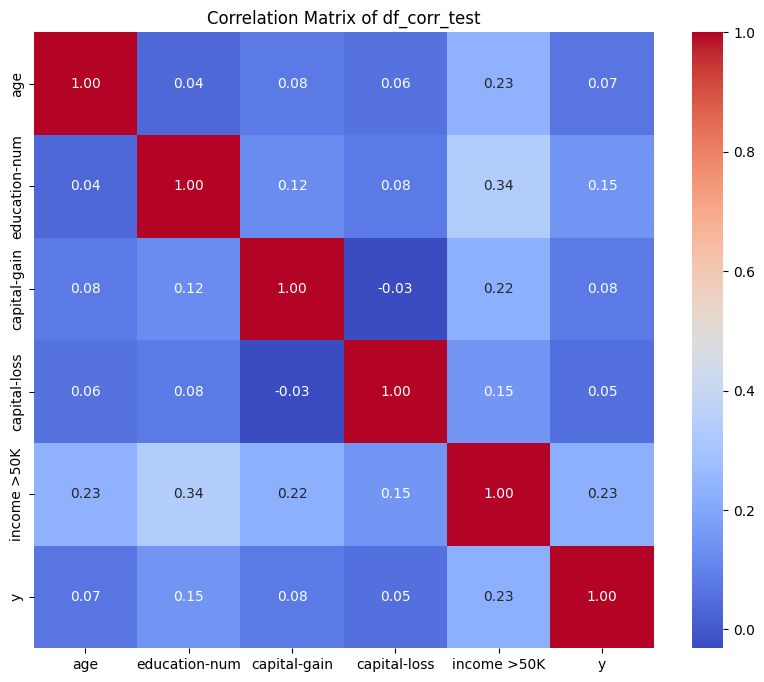

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [10]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 7.71
Mean Squared Error (MSE): 122.92
R^2 Score: 0.20


In [11]:
resolve_regression(X[['education-num', 'income >50K']], y)
None


Regularization: None
Mean Absolute Error (MAE): 7.92
Mean Squared Error (MSE): 144.82
R^2 Score: 0.06


Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [12]:
X

,age,education-num,capital-gain,capital-loss,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,9,0,0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   education-num                              32561 non-null  int64
 2   capital-gain                               32561 non-null  int64
 3   capital-loss                               32561 non-null  int64
 4   income >50K                                32561 non-null  int64
 5   workclass_Local-gov                        32561 non-null  bool 
 6   workclass_Never-worked                     32561 non-null  bool 
 7   workclass_Private                          32561 non-null  bool 
 8   workclass_Self-emp-inc                     32561 non-null  bool 
 9   workclass_Self-emp-not-inc                 32561 non-null  bool 
 10  workclass_State-gov                        325

Отбор признаков по корреляции

In [14]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [16]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [17]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 8.06
Mean Squared Error (MSE): 135.97
R^2 Score: 0.12


In [18]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 8.05
Mean Squared Error (MSE): 138.32
R^2 Score: 0.10


Regularization: None
Mean Absolute Error (MAE): 8.05
Mean Squared Error (MSE): 138.32
R^2 Score: 0.10


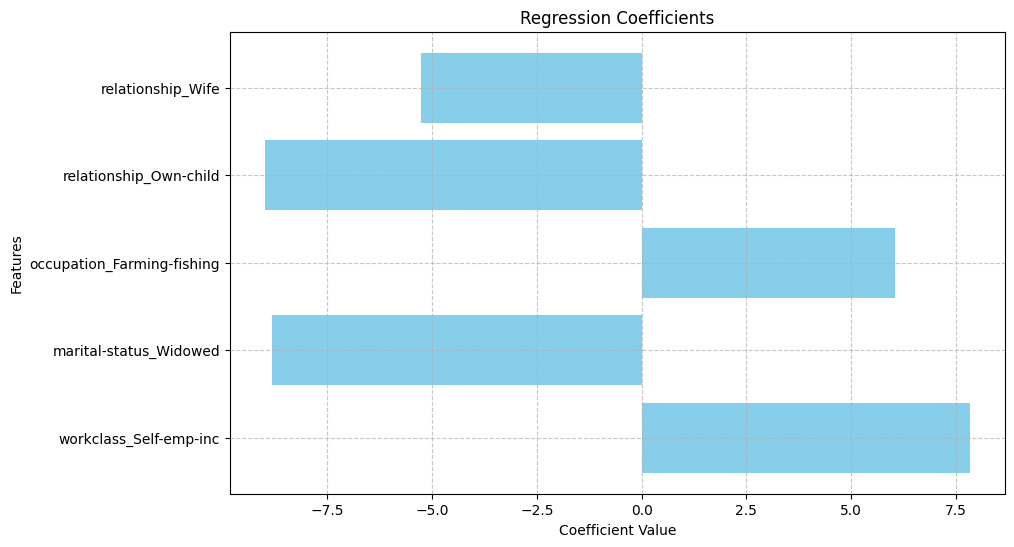

In [19]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [25]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Проверка наличия числовых признаков
if not numeric_features:
    raise ValueError("Нет числовых признаков для нормализации в X_selected_rfe.")

# Выводим отладочную информацию
print("Числовые признаки для нормализации:", numeric_features)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])

Числовые признаки для нормализации: ['workclass_Self-emp-inc', 'marital-status_Widowed', 'occupation_Farming-fishing', 'relationship_Own-child', 'relationship_Wife']


In [26]:
X_selected_rfe

,workclass_Self-emp-inc,marital-status_Widowed,occupation_Farming-fishing,relationship_Own-child,relationship_Wife
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0
32557,0.0,0.0,0.0,0.0,0.0
32558,0.0,1.0,0.0,0.0,0.0
32559,0.0,0.0,0.0,1.0,0.0


Regularization: None
Mean Absolute Error (MAE): 8.05
Mean Squared Error (MSE): 138.32
R^2 Score: 0.10


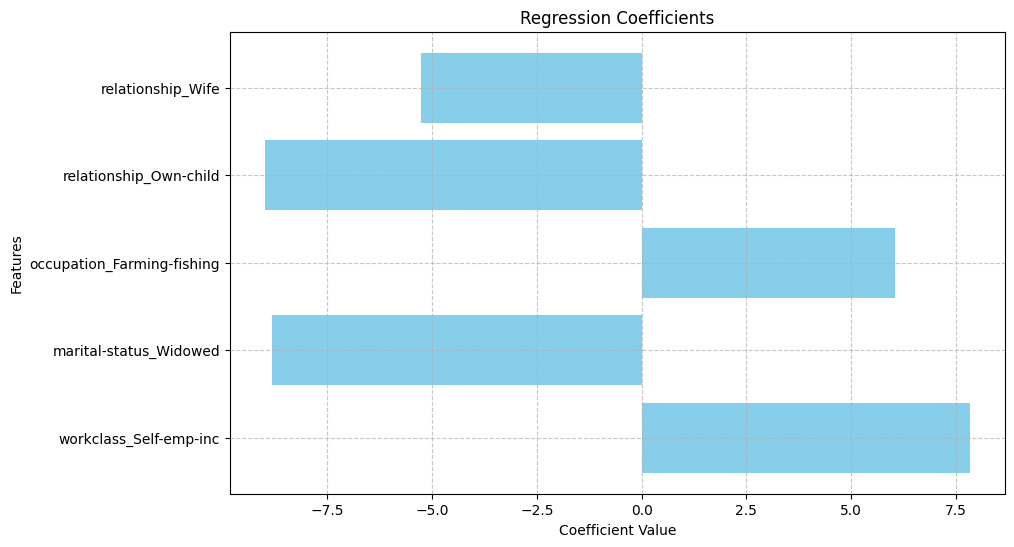

In [27]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [28]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 8.05
Mean Squared Error (MSE): 138.32
R^2 Score: 0.10


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [29]:
X

,age,education-num,capital-gain,capital-loss,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,9,0,0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,9,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 7.70
Mean Squared Error (MSE): 146.49
R^2 Score: 0.05


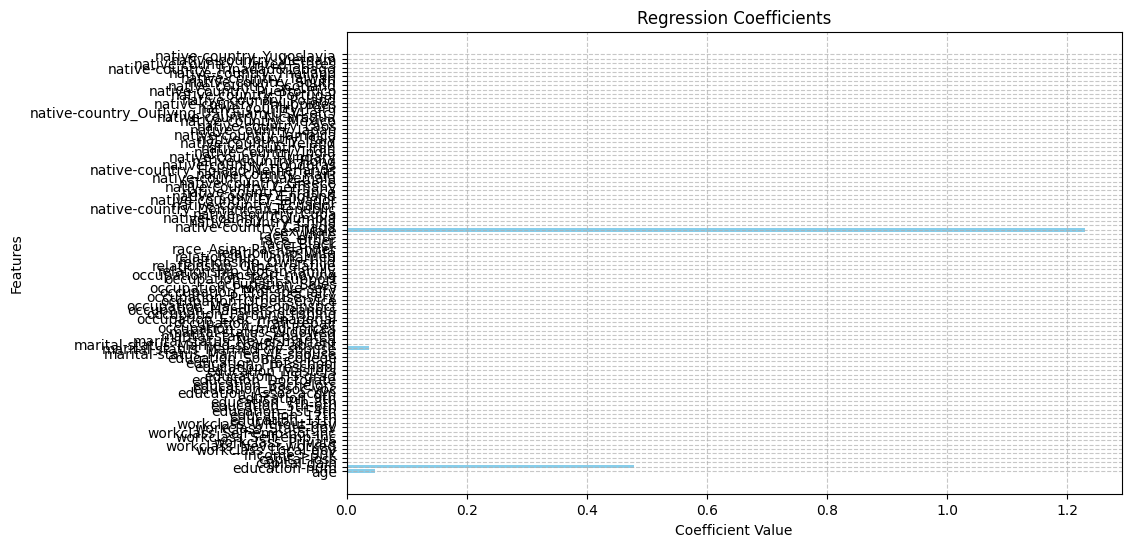

In [30]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 7.71
Mean Squared Error (MSE): 122.91
R^2 Score: 0.20


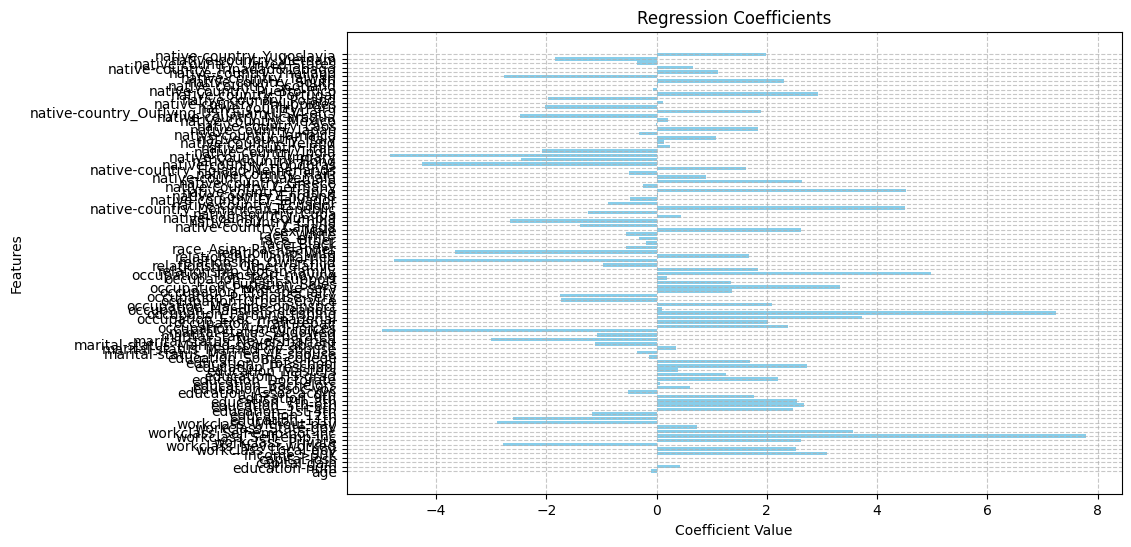

In [31]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 7.71
Mean Squared Error (MSE): 122.92
R^2 Score: 0.20


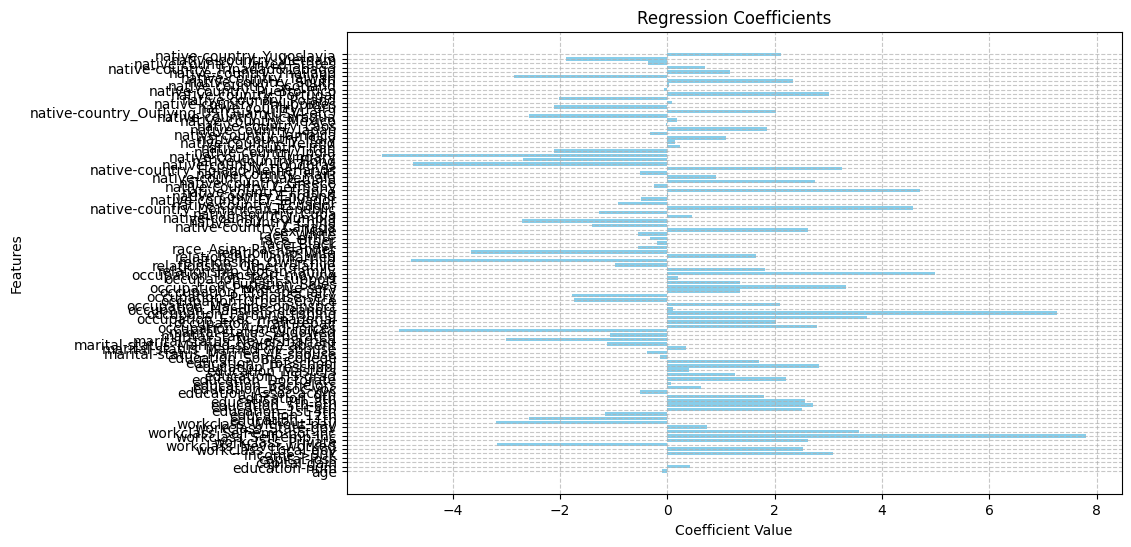

In [32]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)
